# Sentiment Analysis
Sentiment Analysis is the analysis of people's reviews and comments about something

## Application in Zitga:
* Chatbot
* Know what customers usually talk, complain (Discord, chat in-game, Fanpage ...) to improve
* Predict customer's sentiment on new features

## Source:
https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html <br>
https://www.kaggle.com/swarajp/data-visualizations-and-sentiment-analysis<br>
https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

## Import libraries

In [161]:
# visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# text process (NLTK libraries + regex)
import re
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

[nltk_data] Downloading package stopwords to C:\Users\Viet
[nltk_data]     Pm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Viet
[nltk_data]     Pm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Viet
[nltk_data]     Pm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [162]:
raw = pd.concat([pd.read_csv("sk review t5.csv"), pd.read_csv("sk review t6.csv")], ignore_index = True)
raw.head()

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.fansipan.stickman.fight.shadow.knights,NaN,NaN,pt,a20,2020-05-10T14:42:14Z,1.589122e+12,2020-05-10T14:42:14Z,1.589122e+12,5,NaN,NaN,NaN,NaN,NaN,NaN
1,com.fansipan.stickman.fight.shadow.knights,30.0,1.0.98,pt,mcv3,2020-05-10T14:49:36Z,1.589122e+12,2020-05-10T14:49:36Z,1.589122e+12,5,NaN,Muito bom o jogo top de bola,2020-05-11T07:42:55Z,1.589183e+12,Thank you for your feedback and interest in ou...,https://play.google.com/apps/publish?account=7...
2,com.fansipan.stickman.fight.shadow.knights,30.0,1.0.98,pt,sanders_nt,2020-05-10T14:59:15Z,1.589123e+12,2020-05-10T15:00:30Z,1.589123e+12,1,NaN,Game totalmente Pay-to-win ! Cadê os pacotes i...,2020-05-11T07:51:17Z,1.589183e+12,Hello We are very sorry that you did not like ...,https://play.google.com/apps/publish?account=7...
3,com.fansipan.stickman.fight.shadow.knights,30.0,1.0.98,pt,ocean_t,2020-05-10T15:01:53Z,1.589123e+12,2020-05-10T15:01:53Z,1.589123e+12,5,NaN,Muito bom o jogo e bem interessante,2020-05-11T07:42:42Z,1.589183e+12,Greeting! Thank you for your words. Hope you h...,https://play.google.com/apps/publish?account=7...
4,com.fansipan.stickman.fight.shadow.knights,30.0,1.0.98,pt,a20,2020-05-10T15:09:55Z,1.589123e+12,2020-05-10T15:10:05Z,1.589123e+12,5,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           8555 non-null   object 
 1   App Version Code                       6462 non-null   float64
 2   App Version Name                       6462 non-null   object 
 3   Reviewer Language                      8555 non-null   object 
 4   Device                                 8552 non-null   object 
 5   Review Submit Date and Time            8555 non-null   object 
 6   Review Submit Millis Since Epoch       8555 non-null   float64
 7   Review Last Update Date and Time       8555 non-null   object 
 8   Review Last Update Millis Since Epoch  8555 non-null   float64
 9   Star Rating                            8555 non-null   int64  
 10  Review Title                           0 non-null      float64
 11  Revi

In [164]:
df = raw[(~raw["Review Text"].isnull()) & (raw["Reviewer Language"] == "en")].reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           738 non-null    object 
 1   App Version Code                       601 non-null    float64
 2   App Version Name                       601 non-null    object 
 3   Reviewer Language                      738 non-null    object 
 4   Device                                 738 non-null    object 
 5   Review Submit Date and Time            738 non-null    object 
 6   Review Submit Millis Since Epoch       738 non-null    float64
 7   Review Last Update Date and Time       738 non-null    object 
 8   Review Last Update Millis Since Epoch  738 non-null    float64
 9   Star Rating                            738 non-null    int64  
 10  Review Title                           0 non-null      float64
 11  Review

In [165]:
df.head()

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.fansipan.stickman.fight.shadow.knights,42.0,1.0.111,en,B2N_sprout,2020-05-16T15:06:11Z,1.589642e+12,2020-05-16T15:06:11Z,1.589642e+12,3,NaN,"Graphics great, Ashley skills suck, stupid, ju...",2020-05-18T09:40:46Z,1.589795e+12,Hello! Thank you for taking the time to share ...,https://play.google.com/apps/publish?account=7...
1,com.fansipan.stickman.fight.shadow.knights,42.0,1.0.111,en,alphalm,2020-05-23T08:30:40Z,1.590223e+12,2020-05-23T08:30:40Z,1.590223e+12,5,NaN,Great,2020-05-25T03:36:54Z,1.590378e+12,Thank you very much for your 5-star review!!! ...,https://play.google.com/apps/publish?account=7...
2,com.fansipan.stickman.fight.shadow.knights,42.0,1.0.111,en,noblelte,2020-05-24T04:32:43Z,1.590295e+12,2020-05-24T04:32:43Z,1.590295e+12,5,NaN,Fantastic game,2020-05-25T03:38:18Z,1.590378e+12,Thank you for your feedback and interest in ou...,https://play.google.com/apps/publish?account=7...
3,com.fansipan.stickman.fight.shadow.knights,46.0,1.0.132,en,OnePlus5T,2020-05-25T23:30:53Z,1.590449e+12,2020-05-25T23:30:53Z,1.590449e+12,5,NaN,Good,2020-05-26T02:00:30Z,1.590458e+12,Chào bạn Cám ơn bạn đã đánh giá 5 sao cho game...,https://play.google.com/apps/publish?account=7...
4,com.fansipan.stickman.fight.shadow.knights,46.0,1.0.132,en,htc_ocndugl,2020-05-28T02:17:29Z,1.590632e+12,2020-05-28T02:17:29Z,1.590632e+12,5,NaN,Great game,2020-05-28T04:26:51Z,1.590640e+12,Hello Thank you so much for your support. Your...,https://play.google.com/apps/publish?account=7...


In [166]:
df.loc[df["Star Rating"].isin([4, 5]),"Sentiment"] = "Positive"
# df.loc[df["Star Rating"] == 3,"Sentiment"] = "Neutral"
df.loc[df["Star Rating"].isin([1, 2, 3]),"Sentiment"] = "Negative"

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           738 non-null    object 
 1   App Version Code                       601 non-null    float64
 2   App Version Name                       601 non-null    object 
 3   Reviewer Language                      738 non-null    object 
 4   Device                                 738 non-null    object 
 5   Review Submit Date and Time            738 non-null    object 
 6   Review Submit Millis Since Epoch       738 non-null    float64
 7   Review Last Update Date and Time       738 non-null    object 
 8   Review Last Update Millis Since Epoch  738 non-null    float64
 9   Star Rating                            738 non-null    int64  
 10  Review Title                           0 non-null      float64
 11  Review

In [168]:
df.Sentiment.value_counts()

Positive    509
Negative    229
Name: Sentiment, dtype: int64

## I, Preprocessing
### 1, Tokenization
#### Definition: Split strings of text into smaller pieces, or "tokens"
Paragraph => Sentence => Word
### 2, Normalization
#### Put all text on a level playing field: converting all text to the same case (upper or lower), removing punctuation, converting numbers to their word equivalents, and so on.
#### 3 distinct steps: (1) stemming, (2) lemmatization, and (3) everything else
##### a, Stemming
Stemming is the process of eliminating affixes (suffixed, prefixes, infixes, circumfixes) from a word in order to obtain a word stem.<br>
running → run
##### b, Lemmatization
Lemmatization is related to stemming, differing in that lemmatization is able to capture canonical forms based on a word's lemma.<br>
better → good
##### c, Everything else
* Set all characters to lowercase
* Remove numbers (or convert numbers to textual representations)
* Remove punctuation (generally part of tokenization, but still worth keeping in mind at this stage, even as confirmation)
* Strip white space (also generally part of tokenization)
* Remove default stop words (general English stop words)<br>
Stop words are those words which are filtered out before further processing of text, since these words contribute little to overall meaning, given that they are generally the most common words in a language. For instance, "the," "and," and "a," while all required words in a particular passage, don't generally contribute greatly to one's understanding of content. As a simple example, the following panagram is just as legible if the stop words are removed:<br>
The quick brown fox jumps over the lazy dog → quick brown fox jumps over lazy dog
* Remove given (task-specific) stop words
* Remove sparse terms (not always necessary or helpful, though!)<br>

### 3, Noise removal
#### Remove text file headers, footers
#### Remove HTML, XML, etc. markup and metadata
#### Extract valuable data from other formats, such as JSON, or from within databases

In [169]:
reviews = df["Review Text"]
labels = df.Sentiment

In [170]:
#Stop words and Lemmatizer
Stop=set(stopwords.words('english'))
WrdLem=WordNetLemmatizer()
lancaster = LancasterStemmer()
print(Stop)

{'so', 'couldn', 'themselves', 'a', "won't", 'until', "shouldn't", 'into', 'been', 'having', 'above', 'mightn', 'are', 'in', 'own', 'itself', "you'd", 'and', "mightn't", 'up', 'because', 'all', 'over', 'each', 'once', 'while', 'who', 'i', 'no', 'than', 'hers', 'out', 'needn', 'that', "that'll", 'has', 'only', "doesn't", 'her', 'mustn', "should've", 'under', 'how', 'your', 'will', 'am', "haven't", "it's", "she's", 'myself', 'if', 'same', 'him', 'below', 'more', 'don', 'being', 'against', 'their', 'o', 'the', 're', 'before', 'from', 'our', 'when', 'is', 'wasn', 'which', 'ours', 'it', 'such', 'other', 'you', 'at', 'those', 'd', 'doing', 'weren', 'after', 'hasn', 'did', 'they', 'aren', 'were', 'or', 'why', 'isn', 'shan', 'for', "wasn't", 'ourselves', 'any', 'yours', 'y', 'not', 'very', 'shouldn', 'again', 'should', 't', 'by', 'an', 'wouldn', 'to', 'few', 'off', 'have', "isn't", "don't", 'herself', 'me', "you've", 'during', 'with', 've', 'ma', 'she', 'had', 'now', 's', 'where', "couldn't", 

In [171]:
# User-defined function
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [172]:
# choose lemmatize or stem
def preprocess(sent):
    r1 = []
    sent=cleanhtml(sent)
    sent=cleanpunc(sent)
    sent=sent.lower()
    for word in sent.split():
        if ((word.isalpha()) & (len(word)>2)):
            if word not in Stop:
                w=WrdLem.lemmatize(word)
#                 w = lancaster.stem(word)
                r1.append(w)
            else:
                continue
        else:
            continue
    return (" ".join(r1))

In [176]:
df["Cleaned_text"] = df["Review Text"].apply(preprocess)
df[["Review Text","Cleaned_text"]].head(25)

,Review Text,Cleaned_text
0,"Graphics great, Ashley skills suck, stupid, ju...",graphic great ashley skill suck stupid normal ...
1,Great,great
2,Fantastic game,fantastic game
3,Good,good
4,Great game,great game
5,So good,good
6,Is it online?,online
7,bad controls a very lagy cant even put a name ...,bad control lagy cant even put name without cr...
8,"Good graphics, easy controls, smooth and fun g...",good graphic easy control smooth fun gameplay ...
9,nice game,nice game


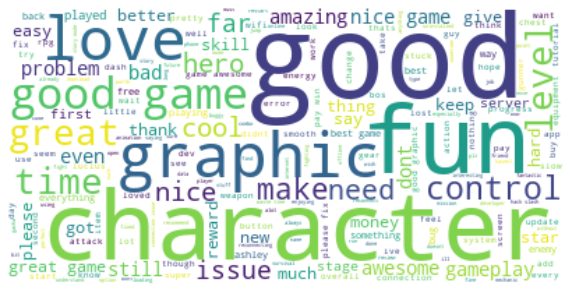

In [177]:
text = " ".join(i for i in df.Cleaned_text)
pos_text = " ".join(i for i in df.loc[df.Sentiment == "Positive", "Cleaned_text"])
neg_text = " ".join(i for i in df.loc[df.Sentiment == "Negative", "Cleaned_text"])

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["play", "game", "really", "one", "cant"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Positive wordcloud

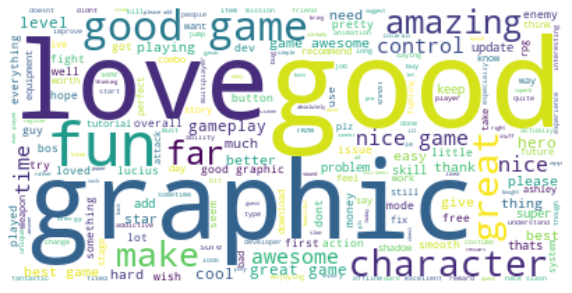

In [178]:
# Generate a word cloud image
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative wordcloud

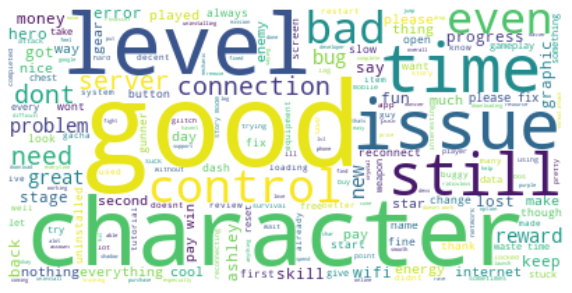

In [179]:
# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [194]:
#Defining some user defined function

def plot_cm_rates(y_test, Y_pred):

    #Plotting Confusion matrix
    x=confusion_matrix(y_test,Y_pred)
    cm_df=pd.DataFrame(x,index=['Negative','Positive'],columns=['Negative','Positive'])

    sns.set(font_scale=1,color_codes=True,palette='deep')
    sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt='d',cmap="YlGnBu")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix ")


def plot_miss_error(cv_scores,hyperparam):
    
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = hyperparam[MSE.index(min(MSE))]
    print('\nThe optimal value of hyper parameter is %f.' % optimal_k)
    
    # plot misclassification error vs K
    plt.figure(figsize=(8,8))
    plt.plot(hyperparam, MSE)

    for xy in zip(hyperparam, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Values of Hyperparameter')
    plt.ylabel('Misclassification Error')
    plt.title("Missclassification error v/s Hyperparameter")
    plt.show()
    
    return optimal_k


def train_test_accuracy(Classifier,X_train,y_train,X_test,y_test):
    
    #Train Model Fitting
    Classifier.fit(X_train,y_train)
    pred_train = Classifier.predict(X_train)
    
    #Train Accuracy
    train_acc = accuracy_score(y_train, pred_train, normalize=True) * float(100)
    
    #Test Accuracy
    pred_test = Classifier.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)
    
    #Printing train and test accuracy
    print('\n****Train accuracy = %f%%' % (train_acc))
    print('\n****Test accuracy =  %f%%' % (test_acc))
    
    #plotting Confusion matrix
    plot_cm_rates(y_test,pred_test)
#     return pred_test

In [181]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(df['Cleaned_text'].values,labels,test_size=0.3,random_state=0)

In [182]:
#Size of training and test data
print("The number of data points used in  training model is %d "%(X_train.shape[0]))
print("The number of data points used in testing model is %d" %(X_test.shape[0]))

The number of data points used in  training model is 516 
The number of data points used in testing model is 222


### Bag of words

In [183]:
#Train Vector
bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train)

#Test vector
X_test_bow=bow.transform(X_test)


The optimal value of hyper parameter is 1.000000.


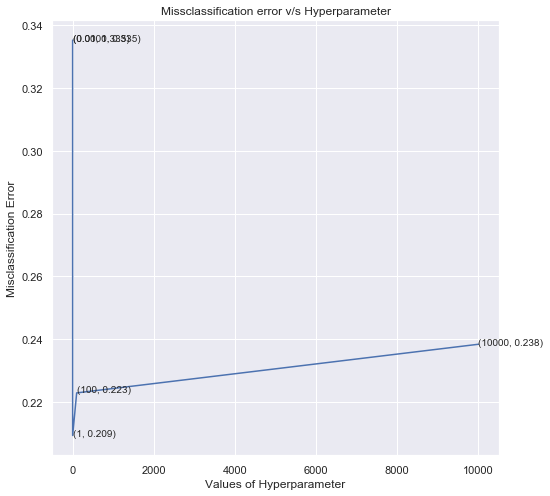

In [184]:
#Hyper-Parameter 
C=[10**-4,10**-2,10**0,10**2,10**4]
#Hyper Parameter tuning
cv_scores=[]
for c in C:
    LR=LogisticRegression(C=c,solver='newton-cg',multi_class='ovr')
    scores=cross_val_score(LR,X_train_bow,y_train,cv=3,scoring='accuracy')
    cv_scores.append(scores.mean())
#Plotting Misclassification error
optimal=plot_miss_error(cv_scores,C)


****Train accuracy = 99.224806%

****Test accuracy =  78.378378%


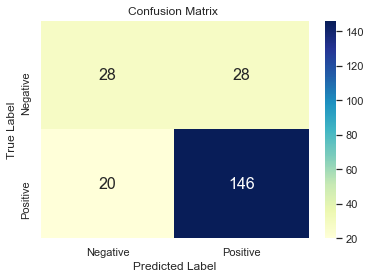

In [195]:
#Model Fitting based on  optimal value and Plotting Confusion Matrix
classifier1=LogisticRegression(C=optimal,solver='newton-cg',multi_class='ovr')

y_pred = train_test_accuracy(classifier1,X_train_bow,y_train,X_test_bow,y_test)

### Tf-idf

In [186]:
#Train vector
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)

#Test Vector
X_test_tfidf=tfidf.transform(X_test)

In [187]:
#Hyper Parameter tunning
cv_scores=[]
for c in C:
    LR=LogisticRegression(C=c,multi_class='ovr',solver='newton-cg')
    scores=cross_val_score(LR,X_train_tfidf,y_train,cv=3,scoring='accuracy')
    cv_scores.append(scores.mean())


The optimal value of hyper parameter is 100.000000.


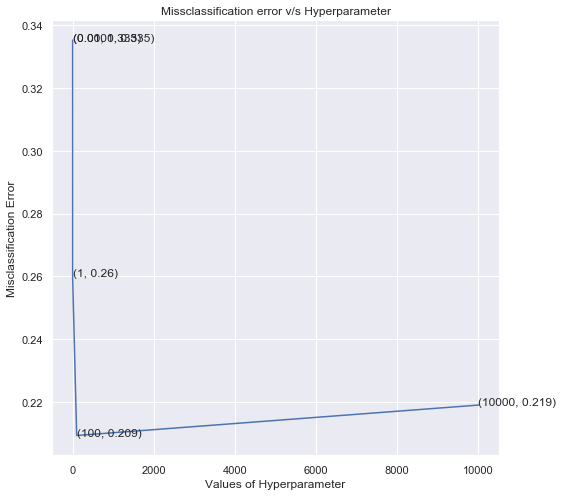

In [188]:
#Plotting misclassification error
optimal=plot_miss_error(cv_scores,C)


****Train accuracy = 99.031008%

****Test accuracy =  81.081081%


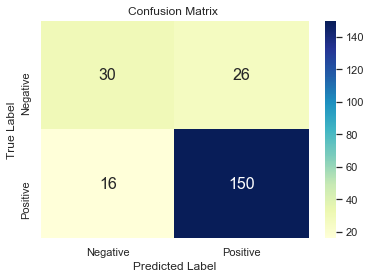

In [196]:
#Model Fitting based on  optimal value and Confusion matrix
classifier1=LogisticRegression(C=optimal,multi_class='ovr',solver='newton-cg')

y_pred = train_test_accuracy(classifier1,X_train_tfidf,y_train,X_test_tfidf,y_test)